In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
data = pd.read_csv('placement.csv')

In [3]:
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
data.shape

(1000, 3)

<Figure size 1000x1000 with 0 Axes>

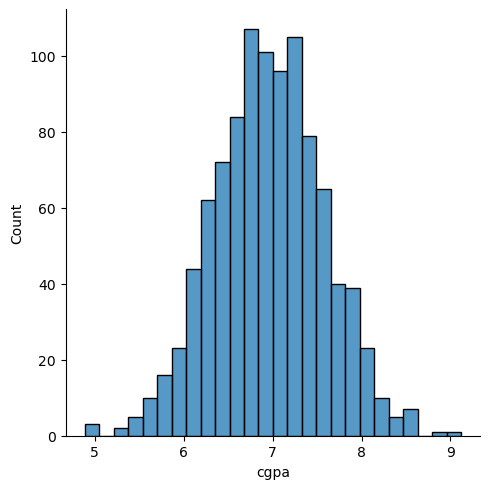

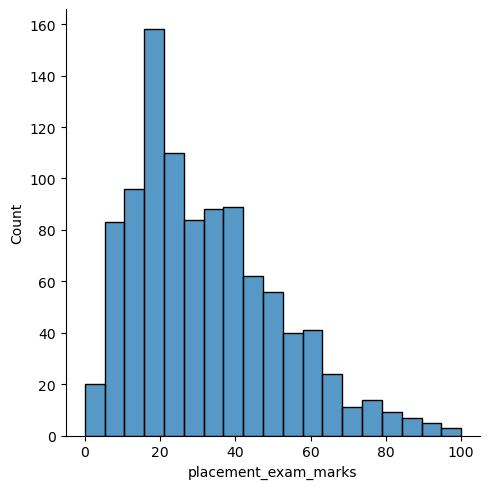

In [5]:
# As we know first we will check the distribution of column how the columns are distributed !
#On the basis of that we will select the outlier detection method and removal method

plt.figure(figsize =(10,10))
sns.displot(data['cgpa'])

sns.displot(data['placement_exam_marks'])


CONCLUSION :  placement_exam_marks  is right skewed .

In [7]:
# Let's use describe function to get max , min 25% and other parameters

data['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

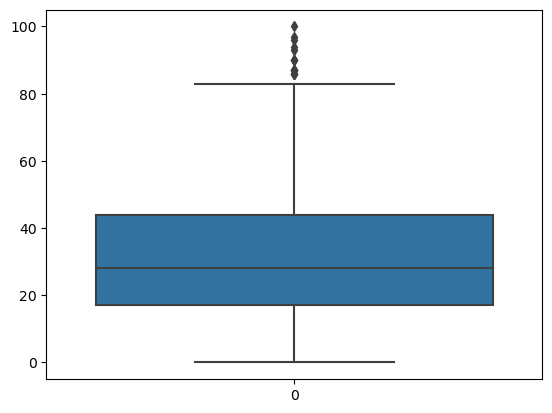

In [8]:
sns.boxplot(data['placement_exam_marks'])

In [10]:
#Let's find IQR

q3 = data['placement_exam_marks'].quantile(0.75)
q1 = data['placement_exam_marks'].quantile(0.25)

In [11]:
q3

44.0

In [12]:
q1

17.0

In [13]:
iqr = q3-q1

In [14]:
iqr

27.0

In [16]:
#upper limit and lower limit
upper = q3+(1.5*iqr)
lower = q1-(1.5*iqr)

In [17]:
upper

84.5

In [18]:
lower

-23.5

### Finding Outliers

In [19]:
data[data['placement_exam_marks']>upper]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [25]:
data[data['placement_exam_marks']>upper].shape

(15, 3)

In [26]:
data[data['placement_exam_marks'] < lower]

,cgpa,placement_exam_marks,placed


# TRIMMING

In [23]:
new_data = data[data['placement_exam_marks']<upper]

In [22]:
new_data

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [24]:
new_data.shape

(985, 3)

### COMPARISION WITH AND WITHOUT OUTLIERS

C:\Users\Hp\AppData\Local\Temp\ipykernel_11540\2641067226.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['placement_exam_marks'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_11540\2641067226.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['placement_exam_marks'])


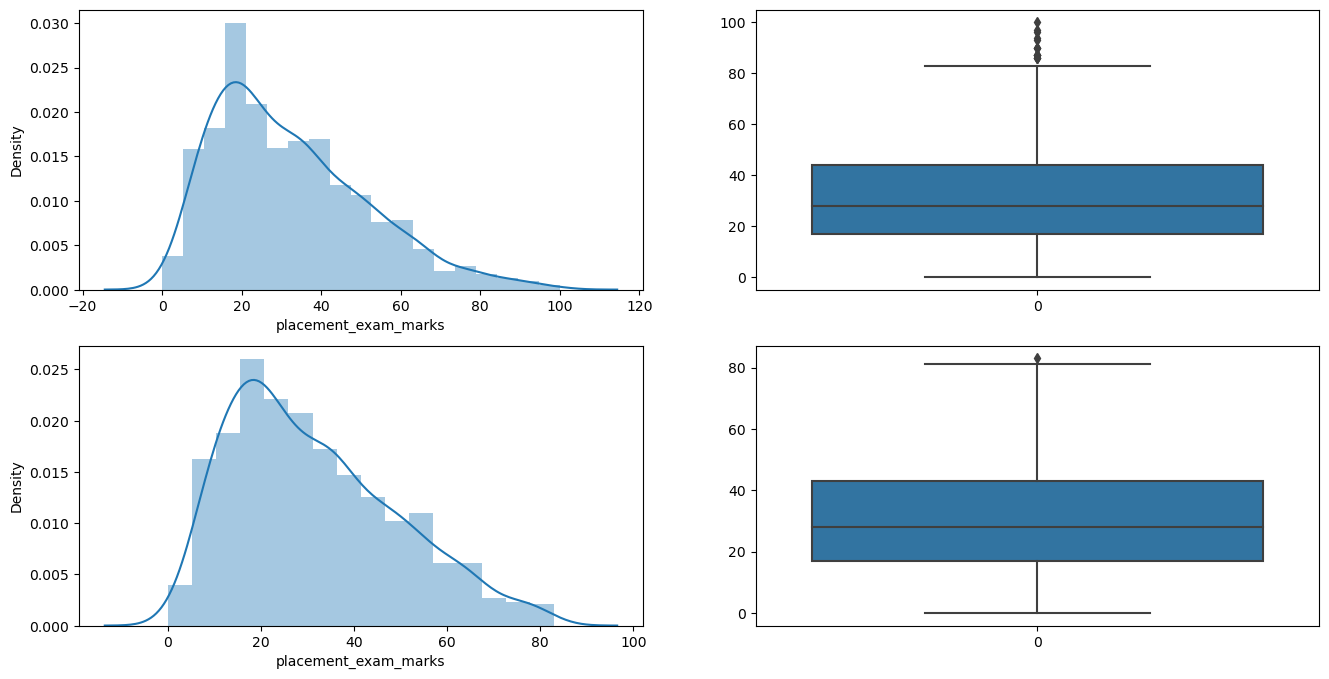

In [29]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(data['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_data['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_data['placement_exam_marks'])

plt.show()

# CAPPING

In [30]:
new_data_cap = data.copy()

In [34]:
new_data_cap['placement_exam_marks'] = np.where(data['placement_exam_marks']>upper , upper ,
                                              np.where(data['placement_exam_marks']>lower , lower , data['placement_exam_marks'] 
                                                      ))

In [35]:
new_data_cap.shape

(1000, 3)

C:\Users\Hp\AppData\Local\Temp\ipykernel_11540\2050766769.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['placement_exam_marks'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_11540\2050766769.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data_cap['placement_exam_marks'])


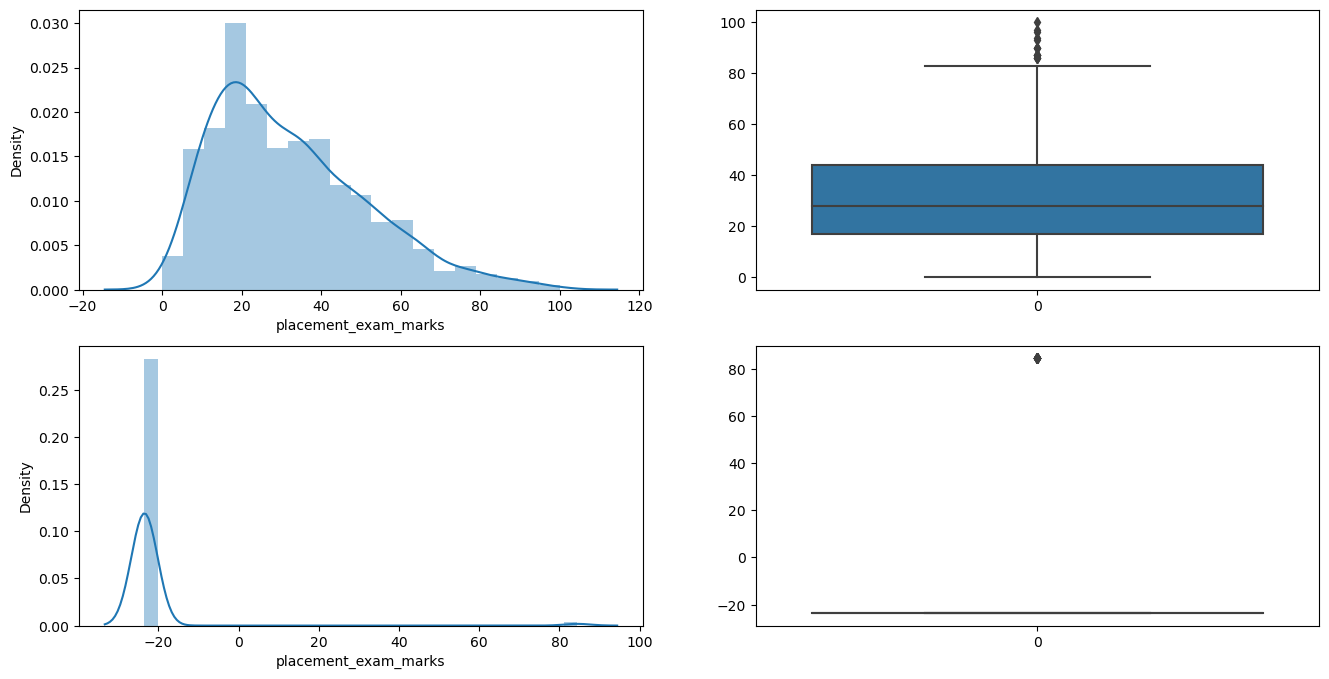

In [36]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(data['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_data_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_data_cap['placement_exam_marks'])

plt.show()